In [1]:
!pip install --upgrade pip
!pip install -U scikit-learn

     ---------------------------------------- 8.3/8.3 MB 10.4 MB/s eta 0:00:00
     ------------------------------------- 298.0/298.0 kB 18.0 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [3]:

df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,text_
0,0,0,458b5835-6a01-43cc-9d18-725441a5950d,Shubham Zain,https://play-lh.googleusercontent.com/a-/ACB-R...,ok,5,0,14.2.0,2023-02-24 14:18:13,NaN,NaN,ok
1,1,1,c73c77f3-9c1e-4bb6-98e7-185935d2b73b,Raphael Ritho,https://play-lh.googleusercontent.com/a/AGNmyx...,Good,5,0,NaN,2023-02-24 13:08:45,NaN,NaN,good
2,2,2,ef636656-b2e7-44bc-a2c1-b34b2f018672,Zhavia Fernando,https://play-lh.googleusercontent.com/a/AGNmyx...,social sya,5,0,14.3.0,2023-02-24 12:16:06,NaN,NaN,social sya
3,3,3,f0305cde-94af-4559-a1ca-55a222a1559a,bereketab folla,https://play-lh.googleusercontent.com/a-/ACB-R...,nice,5,0,14.2.0,2023-02-24 12:02:25,NaN,NaN,nice
4,4,4,4cfeea86-10e4-47a4-a551-54978978524b,Mahmoud Elfeky,https://play-lh.googleusercontent.com/a-/ACB-R...,great app,5,0,14.2.0,2023-02-24 08:58:58,NaN,NaN,great app


In [4]:
df.content=df.content.astype(str)

In [5]:
df.content

0                                                        ok
1                                                      Good
2                                                social sya
3                                                      nice
4                                                 great app
                                ...                        
196703    Wouldnt connect, but after a reinstall works p...
196704                                                   Ok
196705    I've been wishing for this for so long and its...
196706                     Best app ever finally on android
196707                Finally the real Tinder is on Android
Name: content, Length: 196708, dtype: object

In [6]:
def fixContra(text):
    return contractions.fix(text)


In [7]:
pip install contractions


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: c:\users\hp\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [8]:
import contractions

In [23]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [24]:
#Feature Extraction Imports

#Sentiment
from textblob import TextBlob

#POS Tagging
import nltk
nltk.download("popular")
from nltk import FreqDist
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
from collections import Counter
stop_words = set(stopwords.words('english')) 
import re

#Text Feature Generation
import string

[nltk_data] Error loading popular: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [25]:
df['content'] = df['content'].apply(lambda x: fixContra(x))

In [26]:
df['content'] = df['content'].str.replace('\W', ' ')


In [27]:

# \d represents Numeric digits
df['content'] = df['content'].str.replace('\d', ' ')

In [28]:
df['content'] = df['content'].str.lower()

In [29]:
reviews = df['content'].tolist()
#print(reviews)
sentiment_score = []
sentiment_subjectivity=[]
review_head_sentiment=[]
for rev in reviews:
    testimonial = TextBlob(rev)
    sentiment_score.append(testimonial.sentiment.polarity)
    sentiment_subjectivity.append(testimonial.sentiment.subjectivity)

In [30]:
df['Sentiment'] = sentiment_score
df['Subjectivity'] = sentiment_subjectivity
df.head()

,Unnamed: 0,Unnamed: 0.1,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,text_,Sentiment,Subjectivity
0,0,0,458b5835-6a01-43cc-9d18-725441a5950d,Shubham Zain,https://play-lh.googleusercontent.com/a-/ACB-R...,ok,5,0,14.2.0,2023-02-24 14:18:13,NaN,NaN,ok,0.500000,0.500000
1,1,1,c73c77f3-9c1e-4bb6-98e7-185935d2b73b,Raphael Ritho,https://play-lh.googleusercontent.com/a/AGNmyx...,good,5,0,NaN,2023-02-24 13:08:45,NaN,NaN,good,0.700000,0.600000
2,2,2,ef636656-b2e7-44bc-a2c1-b34b2f018672,Zhavia Fernando,https://play-lh.googleusercontent.com/a/AGNmyx...,social sya,5,0,14.3.0,2023-02-24 12:16:06,NaN,NaN,social sya,0.033333,0.066667
3,3,3,f0305cde-94af-4559-a1ca-55a222a1559a,bereketab folla,https://play-lh.googleusercontent.com/a-/ACB-R...,nice,5,0,14.2.0,2023-02-24 12:02:25,NaN,NaN,nice,0.600000,1.000000
4,4,4,4cfeea86-10e4-47a4-a551-54978978524b,Mahmoud Elfeky,https://play-lh.googleusercontent.com/a-/ACB-R...,great app,5,0,14.2.0,2023-02-24 08:58:58,NaN,NaN,great app,0.800000,0.750000


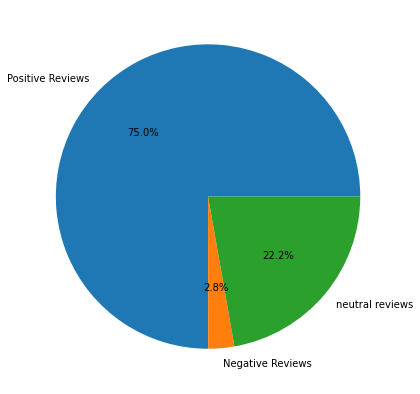

In [34]:
pos = 0
neg = 0
neu = 0
for score in df['Sentiment']:
    if score > 0:
        pos += 1
    elif score < 0:
        neg += 1
    else: 
        neu += 1

#Visualiing the distribution of Sentiment
values = [pos, neg, neu]
label = ['Positive Reviews', 'Negative Reviews', 'neutral reviews']

fig = plt.figure(figsize =(10, 7)) 
plt.pie(values, labels = label,autopct='%1.1f%%')

plt.show()